# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
data = pd.read_csv('./data/application_train_vf.csv')

# Description des variables

* TARGET : (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
* NAME_CONTRACT_TYPE :	Identification if loan is cash or revolving
* CODE_GENDER	Gender of the client
* FLAG_OWN_CAR	Flag if the client owns a car
* FLAG_OWN_REALTY	Flag if client owns a house or flat
* CNT_CHILDREN	Number of children the client has
* AMT_INCOME_TOTAL	Income of the client
AMT_CREDIT	Credit amount of the loan
* AMT_ANNUITY	Loan annuity
* AMT_GOODS_PRICE	For consumer loans it is the price of the goods for which the loan is given
* NAME_TYPE_SUITE	Who was accompanying client when he was applying for the loan
* NAME_INCOME_TYPE	Clients income type (businessman, working, maternity leave,…)
* NAME_EDUCATION_TYPE	Level of highest education the client achieved
* NAME_FAMILY_STATUS	Family status of the client
* NAME_HOUSING_TYPE	What is the housing situation of the client (renting, living with parents, ...)
* REGION_POPULATION_RELATIVE	Normalized population of region where client lives (higher number means the client lives in more populated region)
* DAYS_BIRTH	Client's age in days at the time of application
* DAYS_EMPLOYED	How many days before the application the person started current employment
* DAYS_REGISTRATION	How many days before the application did client change his registration
* DAYS_ID_PUBLISH	How many days before the application did client change the identity document with which he applied for the loan
* OWN_CAR_AGE	Age of client's car
* FLAG_MOBIL	Did client provide mobile phone (1=YES, 0=NO)
* FLAG_EMP_PHONE	Did client provide work phone (1=YES, 0=NO)
* FLAG_WORK_PHONE	Did client provide home phone (1=YES, 0=NO)
* FLAG_CONT_MOBILE	Was mobile phone reachable (1=YES, 0=NO)
* FLAG_PHONE	Did client provide home phone (1=YES, 0=NO)
* FLAG_EMAIL	Did client provide email (1=YES, 0=NO)
* OCCUPATION_TYPE	What kind of occupation does the client have
* CNT_FAM_MEMBERS	How many family members does client have
* REGION_RATING_CLIENT	Our rating of the region where client lives (1,2,3)
* REGION_RATING_CLIENT_W_CITY	Our rating of the region where client lives with taking city into account (1,2,3)
* WEEKDAY_APPR_PROCESS_START	On which day of the week did the client apply for the loan
* HOUR_APPR_PROCESS_START	Approximately at what hour did the client apply for the loan
* REG_REGION_NOT_LIVE_REGION	Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
* REG_REGION_NOT_WORK_REGION	Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
* LIVE_REGION_NOT_WORK_REGION	Flag if client's contact address does not match work address (1=different, 0=same, at region level)
* REG_CITY_NOT_LIVE_CITY	Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
* REG_CITY_NOT_WORK_CITY	Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
* LIVE_CITY_NOT_WORK_CITY	Flag if client's contact address does not match work address (1=different, 0=same, at city level)
* ORGANIZATION_TYPE	Type of organization where client works
* EXT_SOURCE_1	Normalized score from external data source
* EXT_SOURCE_2	Normalized score from external data source
* EXT_SOURCE_3	Normalized score from external data source
* APARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* BASEMENTAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BEGINEXPLUATATION_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BUILD_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* COMMONAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ELEVATORS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ENTRANCES_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMAX_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMIN_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LANDAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* APARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* BASEMENTAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BEGINEXPLUATATION_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BUILD_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* COMMONAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ELEVATORS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ENTRANCES_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMAX_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMIN_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LANDAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* APARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* BASEMENTAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BEGINEXPLUATATION_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BUILD_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* COMMONAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ELEVATORS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ENTRANCES_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMAX_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMIN_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LANDAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAPARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAPARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FONDKAPREMONT_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* HOUSETYPE_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* TOTALAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* WALLSMATERIAL_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* EMERGENCYSTATE_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* OBS_30_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings with observable 30 DPD (days past due) default
* DEF_30_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
* OBS_60_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings with observable 60 DPD (days past due) default
* DEF_60_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings defaulted on 60 (days past due) DPD
* DAYS_LAST_PHONE_CHANGE	How many days before application did client change phone
* FLAG_DOCUMENT_2	Did client provide document 2
* FLAG_DOCUMENT_3	Did client provide document 3
* FLAG_DOCUMENT_4	Did client provide document 4
* FLAG_DOCUMENT_5	Did client provide document 5
* FLAG_DOCUMENT_6	Did client provide document 6
* FLAG_DOCUMENT_7	Did client provide document 7
* FLAG_DOCUMENT_8	Did client provide document 8
* FLAG_DOCUMENT_9	Did client provide document 9
* FLAG_DOCUMENT_10	Did client provide document 10
* FLAG_DOCUMENT_11	Did client provide document 11
* FLAG_DOCUMENT_12	Did client provide document 12
* FLAG_DOCUMENT_13	Did client provide document 13
* FLAG_DOCUMENT_14	Did client provide document 14
* FLAG_DOCUMENT_15	Did client provide document 15
* FLAG_DOCUMENT_16	Did client provide document 16
* FLAG_DOCUMENT_17	Did client provide document 17
* FLAG_DOCUMENT_18	Did client provide document 18
* FLAG_DOCUMENT_19	Did client provide document 19
* FLAG_DOCUMENT_20	Did client provide document 20
* FLAG_DOCUMENT_21	Did client provide document 21
* AMT_REQ_CREDIT_BUREAU_HOUR	Number of enquiries to Credit Bureau about the client one hour before application
* AMT_REQ_CREDIT_BUREAU_DAY	Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
* AMT_REQ_CREDIT_BUREAU_WEEK	Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
* AMT_REQ_CREDIT_BUREAU_MON	Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
* AMT_REQ_CREDIT_BUREAU_QRT	Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
* AMT_REQ_CREDIT_BUREAU_YEAR	Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)



# Dates

In [3]:
data['date_mensuelle'] = pd.to_datetime(data['date_mensuelle'])

# Missing values

## Variables catégorielles

In [4]:
data.drop(columns='Unnamed: 0',inplace = True)

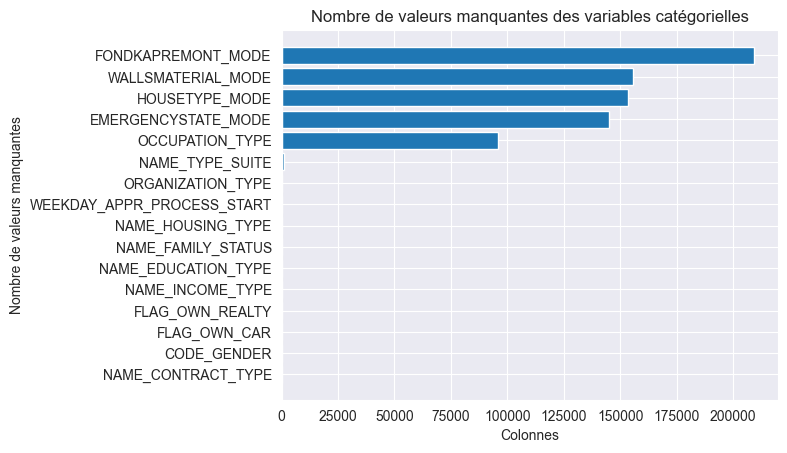

In [5]:
missing_values = data.select_dtypes(include = 'object').isna().sum()

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables catégorielles')

plt.show()

## Variables indicatrices

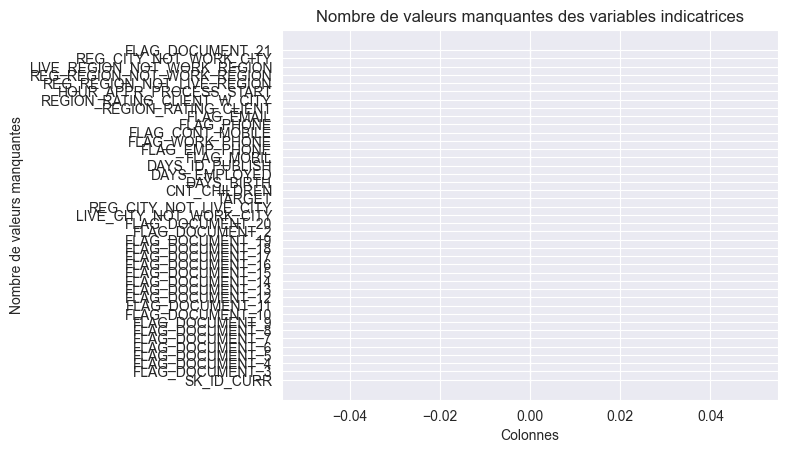

In [6]:
missing_values = data.select_dtypes(include = 'int').isna().sum()

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables indicatrices')

plt.show()

## Variables continues

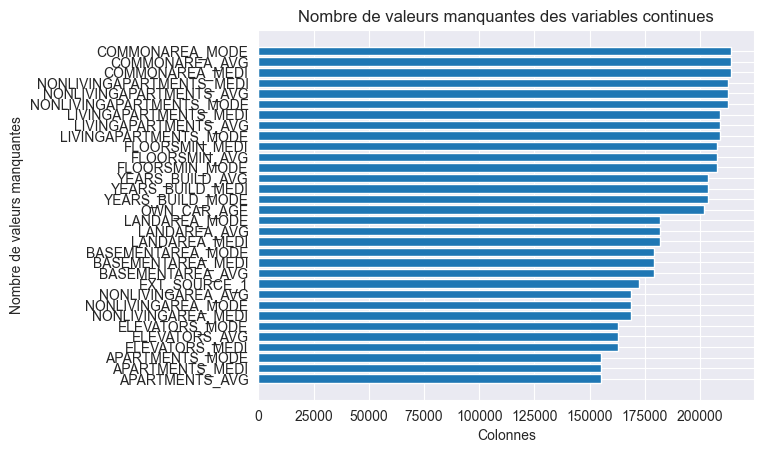

In [7]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values>155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

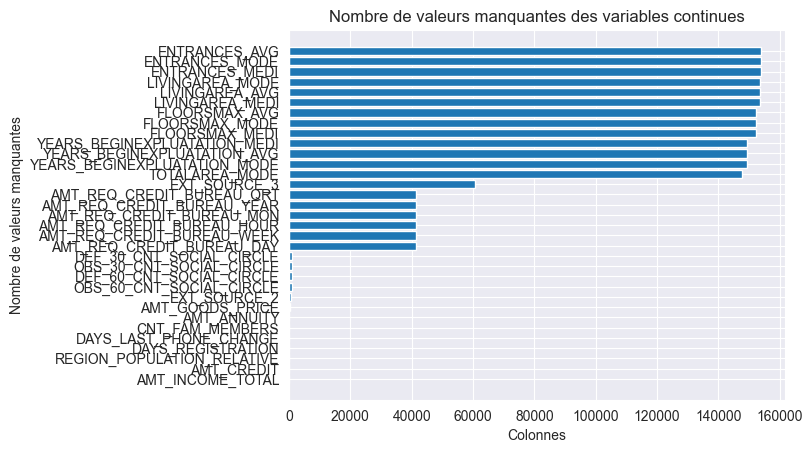

In [8]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values<155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

# Variables categorielles

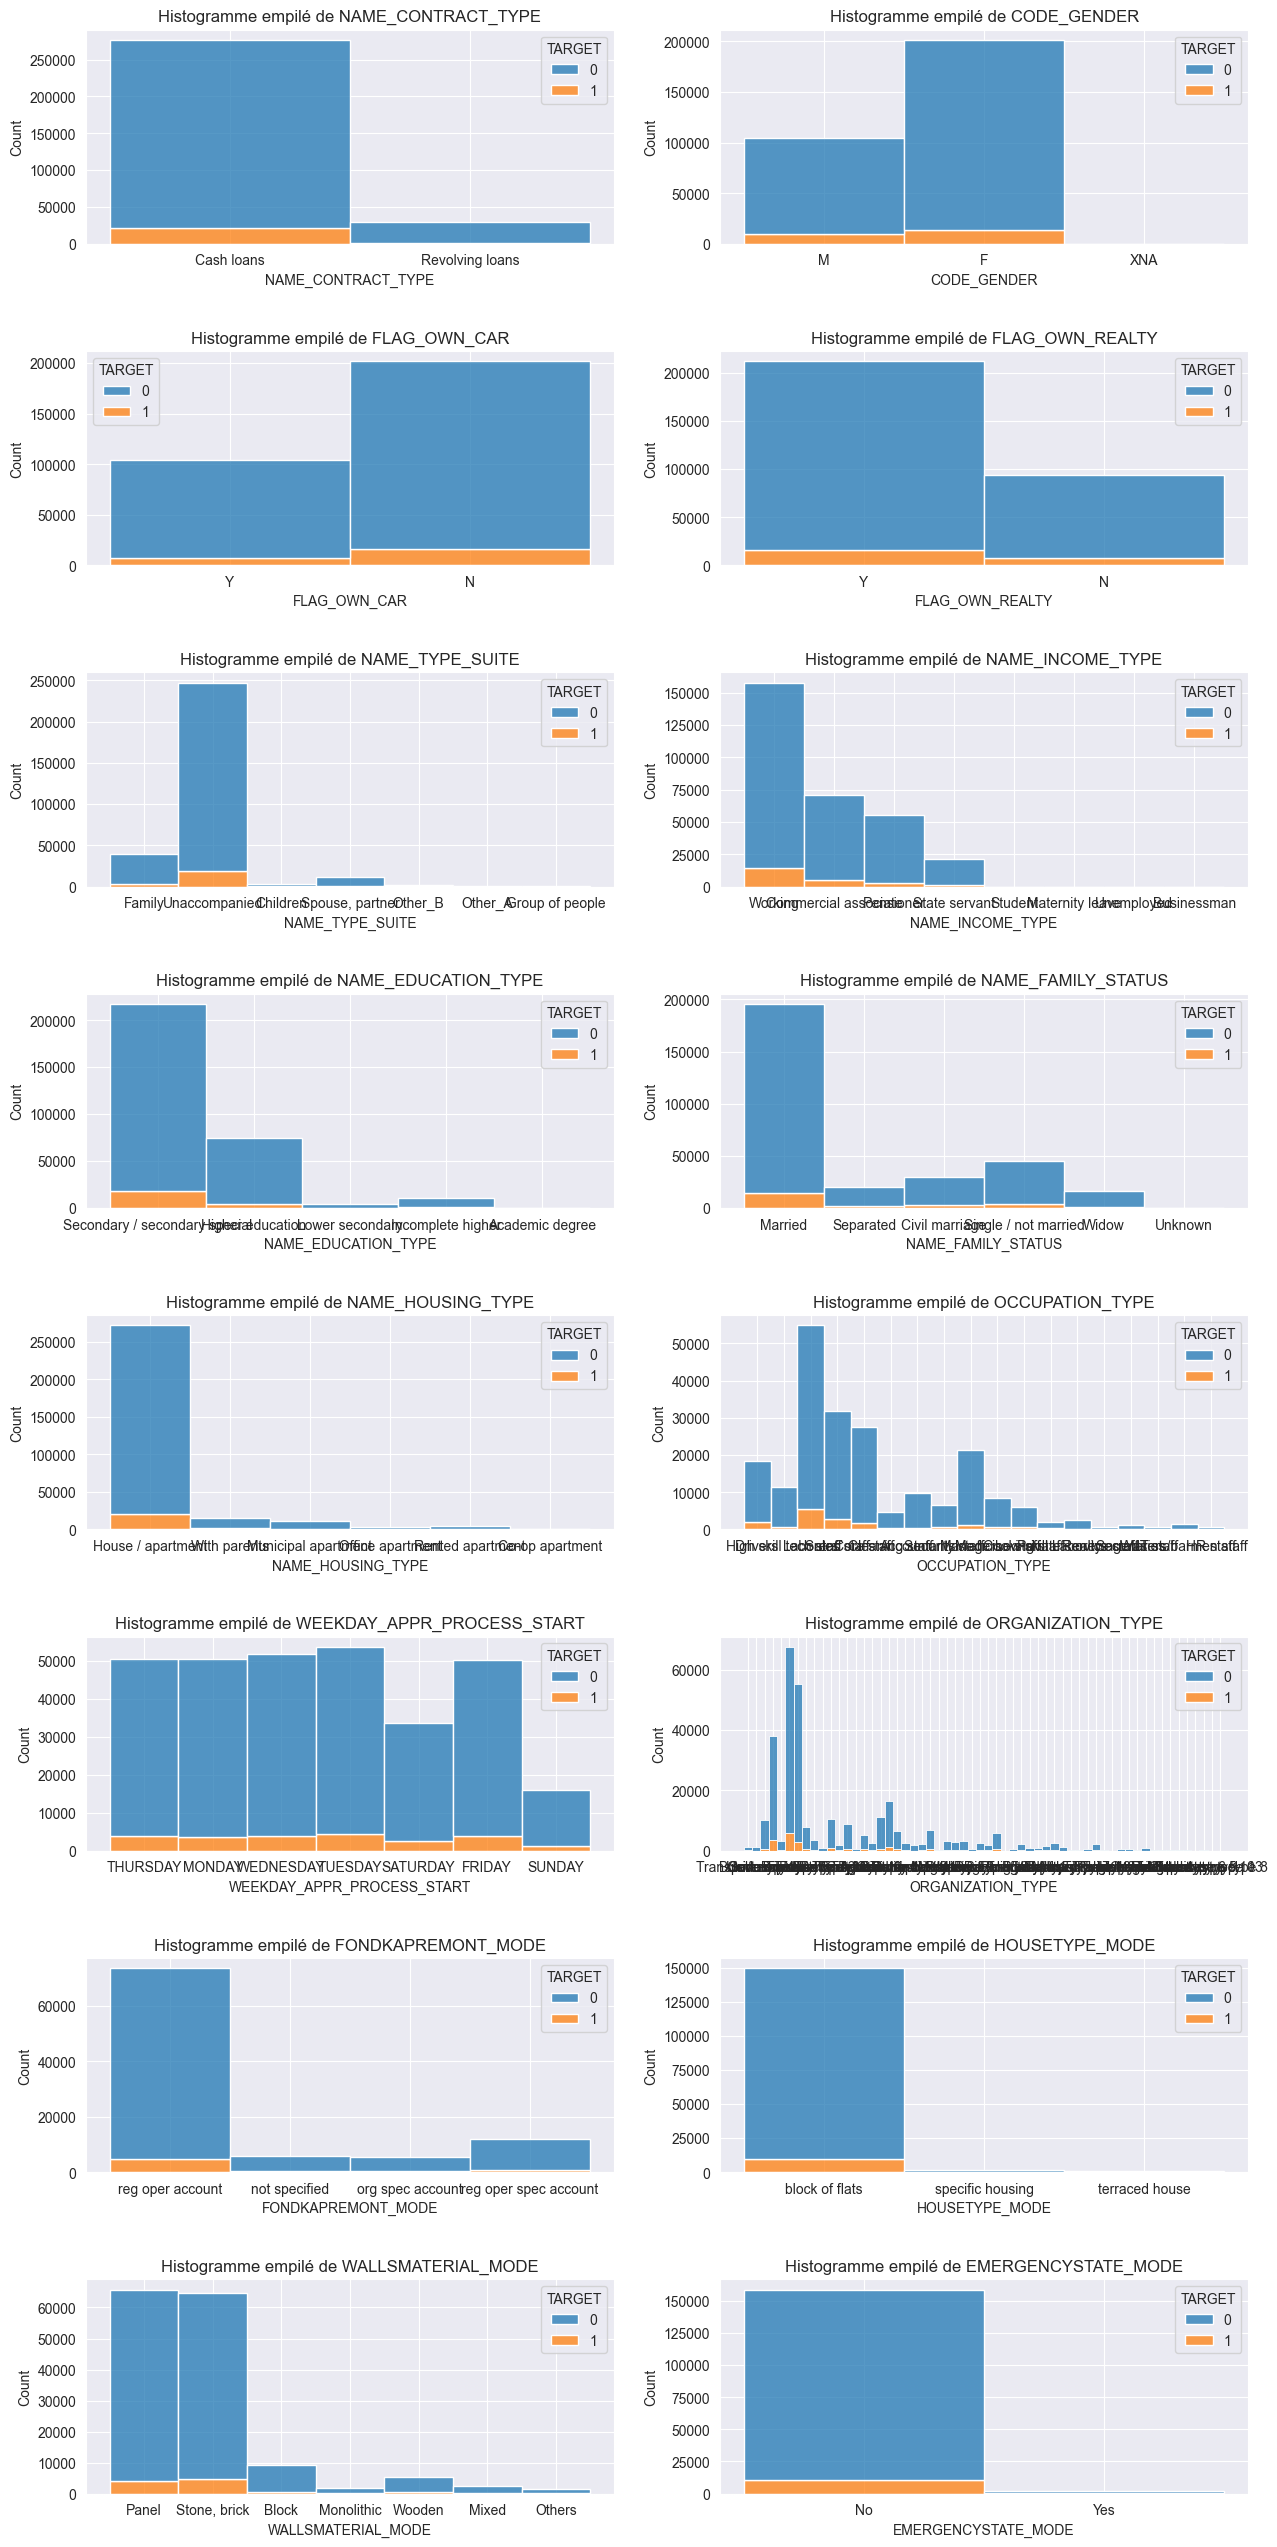

In [33]:
obj_columns = data.select_dtypes(include='object').columns

num_cols = 2
num_rows = (len(obj_columns) + 1) // 2  # Ajouter 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(obj_columns):
    sns.histplot(data, x=col, hue='TARGET', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Histogramme empilé de {col}')

plt.show()

# Variables numériques

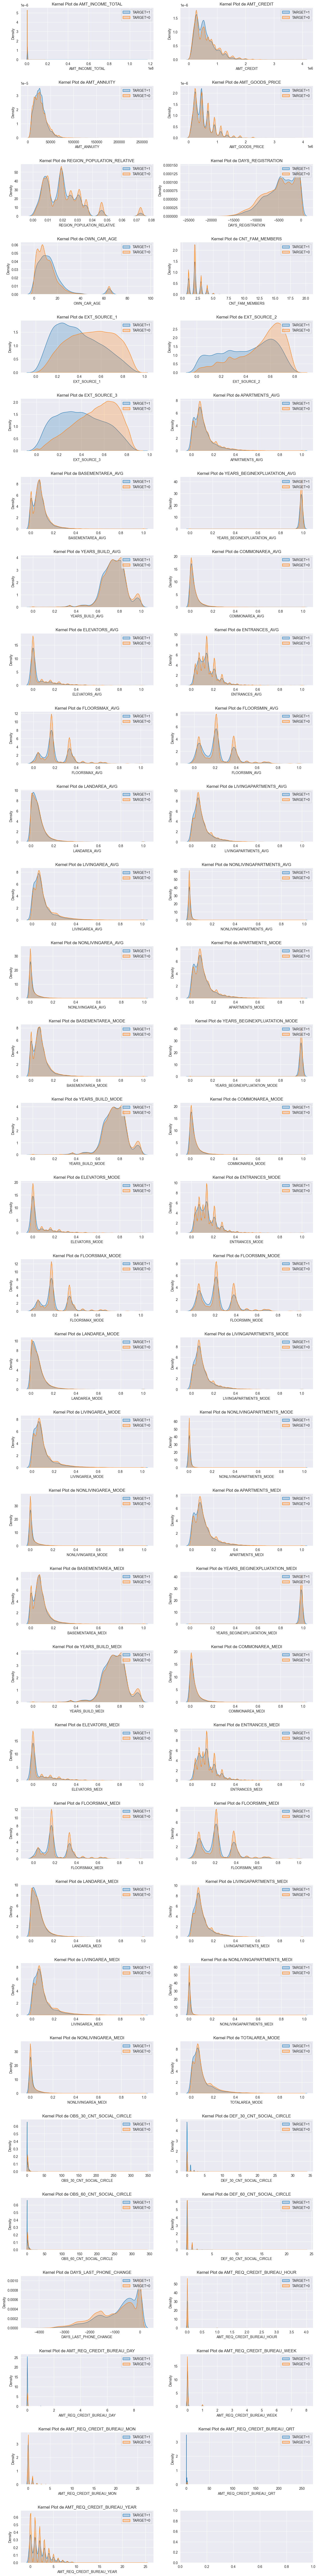

In [12]:
# Séparer les données en fonction de la variable cible
data_1 = data[data['TARGET'] == 1]
data_0 = data[data['TARGET'] == 0]

float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.kdeplot(x=data_1[col], ax=axes[i], fill=True, label='TARGET=1')
    sns.kdeplot(x=data_0[col], ax=axes[i], fill=True, label='TARGET=0')
    axes[i].set_title(f'Kernel Plot de {col}')
    axes[i].legend()  # Ajouter une légende pour distinguer les deux groupes

plt.show()


# Stabilité temporelle en défaut et en volume des variables

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\baheu\AppData\Local\Temp\ipykernel_14372\2033281588.py", line 33, in <module>
    plot_stability(col)
  File "C:\Users\baheu\AppData\Local\Temp\ipykernel_14372\2033281588.py", line 8, in plot_stability
    axes[0].plot(stability_volume_df.index, values, label=f'Classe {class_label}', marker='o')
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\matplotlib\axes\_axes.py", line 1724, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\matplotlib\axes\_base.py", line 303, in __call__
    yield from self._plot_args(
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\matplotlib\

Error in callback <function _draw_all_if_interactive at 0x000001DBD7170E50> (for post_execute), with arguments args (),kwargs {}:
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\IPython\core\events.py", line 82, in trigger
    func(*args, **kwargs)
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\matplotlib\pyplot.py", line 197, in _draw_all_if_interactive
    draw_all()
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\matplotlib\_pylab_helpers.py", line 132, in draw_all
    manager.canvas.draw_idle()
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\matplotlib\backend_bases.py", line 1893, in draw_idle
    self.draw(*args, **kwargs)
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 388, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\baheu\Documents\M2 MoSEF\Challenge_Nexialog\venv\lib\site-packages\matplotlib\artist.py", line 95, in draw_wrapper
    re

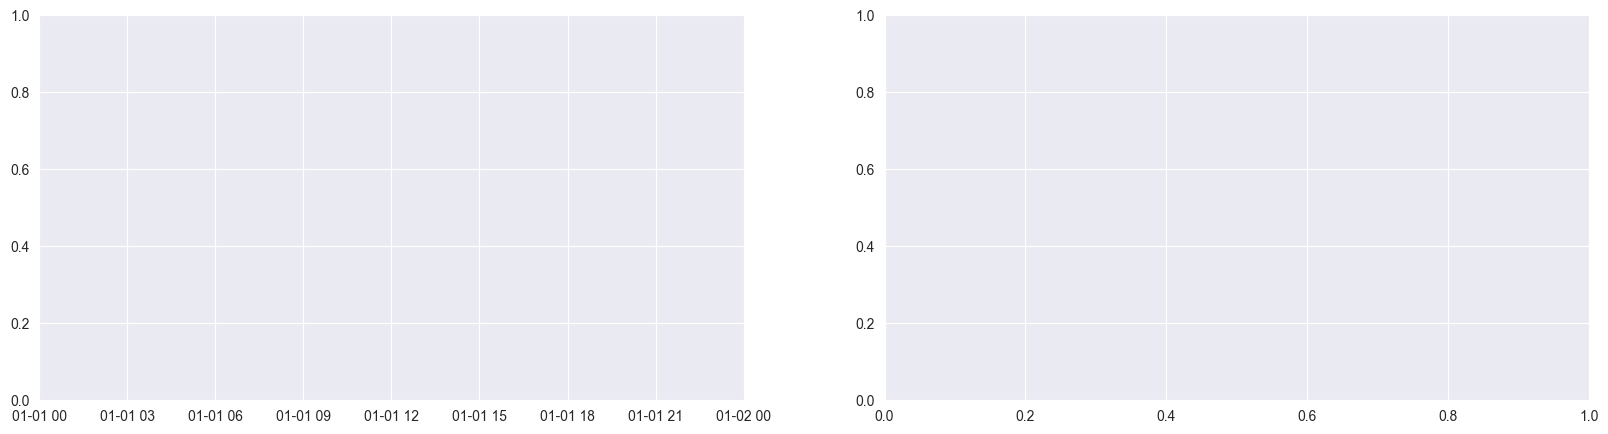

In [48]:
def plot_stability(variable):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    stability_volume_df = data.groupby(['date_mensuelle', variable]).size().unstack()

    for class_label in stability_volume_df.columns:
        values = stability_volume_df[class_label]
        axes[0].plot(stability_volume_df.index, values, label=f'Classe {class_label}', marker='o')

    axes[0].set_title(f'Stabilité de volume pour {variable}')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Nombre d\'observations')
    axes[0].legend(title='Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    axes[0].tick_params(axis='x', rotation=45)

    stability_taux_df = data.groupby(['date_mensuelle', variable])['TARGET'].mean().unstack()
    stability_taux_df['stability'] = stability_taux_df.std(axis=1) / stability_taux_df.mean(axis=1)

    for class_label in stability_taux_df.drop('stability', axis=1).columns:
        values = stability_taux_df[class_label]
        axes[1].plot(stability_taux_df.index, values, label=f'Classe {class_label}', marker='o')

    axes[1].set_title(f'Stabilité de taux pour {variable}')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Proportion de la cible TARGET')
    axes[1].legend(title='Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

for col in data.columns : 
    plot_stability(col)

# Corrélations entre variables numériques

In [20]:
corr_matrix = data.select_dtypes(include='number').corr(method='spearman')

In [21]:
col_corr = np.transpose(corr_matrix[np.abs(corr_matrix['TARGET'])>0.05]).columns
corr = corr_matrix.loc[col_corr,col_corr]

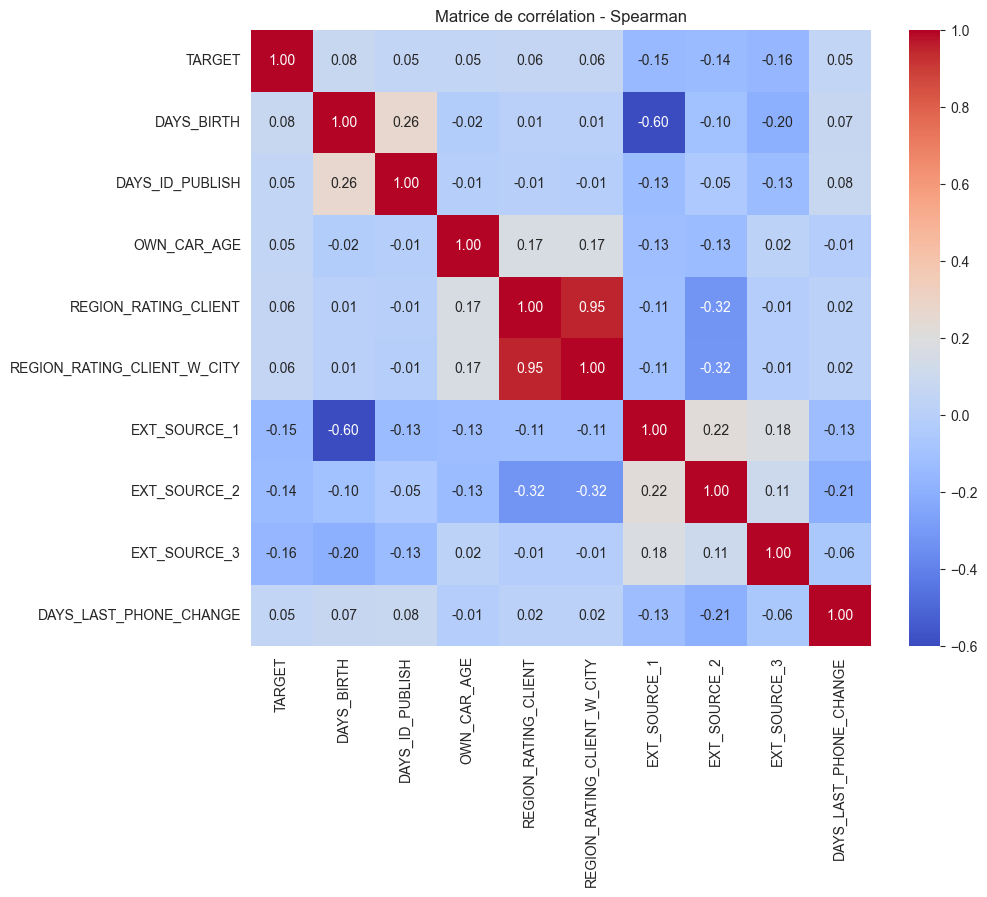

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer la heatmap avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation - Spearman')
plt.show()


# Tests d'indépendance
## Tests d'indépendance entre variables qualitatives et TARGET

In [23]:
var_cat_dependantes = []

for column in data.select_dtypes(include='object').columns:
    if column != 'TARGET':  
        contingency_table = pd.crosstab(data['TARGET'], data[column])
        _, p_value, _, _ = chi2_contingency(contingency_table)
        
        if p_value > 0.05 :
            print(f": On conserve H0, {column} et TARGET sont indépendantes : p-value = {p_value}")
        if p_value < 0.05 :
            print(f"On rejette H0, {column} et TARGET ne sont pas indépendantes : p-value = {p_value}")
            var_cat_dependantes.append(column)


On rejette H0, NAME_CONTRACT_TYPE et TARGET ne sont pas indépendantes : p-value = 1.6251189852988708e-65
On rejette H0, CODE_GENDER et TARGET ne sont pas indépendantes : p-value = 1.9596875716829733e-193
On rejette H0, FLAG_OWN_CAR et TARGET ne sont pas indépendantes : p-value = 1.3628870793279107e-32
On rejette H0, FLAG_OWN_REALTY et TARGET ne sont pas indépendantes : p-value = 0.0006736032854015423
On rejette H0, NAME_TYPE_SUITE et TARGET ne sont pas indépendantes : p-value = 5.614234219566747e-06
On rejette H0, NAME_INCOME_TYPE et TARGET ne sont pas indépendantes : p-value = 1.0953319884731726e-254
On rejette H0, NAME_EDUCATION_TYPE et TARGET ne sont pas indépendantes : p-value = 3.1808411149956268e-208
On rejette H0, NAME_FAMILY_STATUS et TARGET ne sont pas indépendantes : p-value = 5.087983388119823e-101
On rejette H0, NAME_HOUSING_TYPE et TARGET ne sont pas indépendantes : p-value = 1.5625626526484685e-83
On rejette H0, OCCUPATION_TYPE et TARGET ne sont pas indépendantes : p-valu

In [24]:
data_corr = data[var_cat_dependantes]

## Tests d'indépendance entre variables quantitatives et TARGET


In [38]:
var_num_dependantes = []
for col in  data.select_dtypes(include='number').columns:
    data[col] = data[col].fillna(0)
for column in data.select_dtypes(include='number').columns:
    if column != 'TARGET':
        groupe_0 = [data[column][i] for i in range(len(data['TARGET'])) if data['TARGET'][i] == 0]
        groupe_1 = [data[column][i] for i in range(len(data['TARGET'])) if data['TARGET'][i] == 1]
        
        statistique_U, p_value = stats.mannwhitneyu(groupe_0, groupe_1)
        
        if p_value > 0.05:
            print(f"On conserve H0, {column} et TARGET sont indépendantes : p-value = {p_value}")
        if p_value < 0.05:
            print(f"On rejette H0, {column} et TARGET ne sont pas indépendantes : p-value = {p_value}")
            var_num_dependantes.append(column)

On conserve H0, SK_ID_CURR et TARGET sont indépendantes : p-value = 0.30655269093648363
On rejette H0, CNT_CHILDREN et TARGET ne sont pas indépendantes : p-value = 1.1327581536324088e-26
On rejette H0, AMT_INCOME_TOTAL et TARGET ne sont pas indépendantes : p-value = 1.0581048876167883e-22
On rejette H0, AMT_CREDIT et TARGET ne sont pas indépendantes : p-value = 3.024632866262858e-20
On conserve H0, AMT_ANNUITY et TARGET sont indépendantes : p-value = 0.919802860408442
On rejette H0, AMT_GOODS_PRICE et TARGET ne sont pas indépendantes : p-value = 3.0922324856716255e-63
On rejette H0, REGION_POPULATION_RELATIVE et TARGET ne sont pas indépendantes : p-value = 9.37075983273628e-61
On rejette H0, DAYS_BIRTH et TARGET ne sont pas indépendantes : p-value = 0.0
On rejette H0, DAYS_EMPLOYED et TARGET ne sont pas indépendantes : p-value = 2.181297500295199e-42
On rejette H0, DAYS_REGISTRATION et TARGET ne sont pas indépendantes : p-value = 1.0171515290229455e-101
On rejette H0, DAYS_ID_PUBLISH e

In [39]:
var_num_dependantes.extend(var_cat_dependantes)

In [40]:
var_num_dependantes

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'F

In [41]:
df = data[var_num_dependantes]

In [42]:
df['TARGET'] = data.TARGET.copy()

C:\Users\baheu\AppData\Local\Temp\ipykernel_14372\3833605650.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Outliers 

In [43]:
def pourcentage_outliers(col):
    z_scores = zscore(col)
    outliers = (np.abs(z_scores) > 3)  
    return np.mean(outliers) * 100

pourcentages_outliers = df.select_dtypes(include = 'number').apply(pourcentage_outliers)

resultats_df = pd.DataFrame({'Pourcentage_Outliers': pourcentages_outliers})

resultats_df

,Pourcentage_Outliers
CNT_CHILDREN,1.388077
AMT_INCOME_TOTAL,0.147987
AMT_CREDIT,1.060740
AMT_GOODS_PRICE,1.357042
REGION_POPULATION_RELATIVE,2.742505
...,...
FLAG_DOCUMENT_18,0.814421
AMT_REQ_CREDIT_BUREAU_DAY,0.484144
AMT_REQ_CREDIT_BUREAU_MON,1.703326
AMT_REQ_CREDIT_BUREAU_QRT,0.749411


# Conclusion

## Valeurs manquantes

On a pas de valeurs manquantes du coté des variables indicatrices.

6 variables categorielles contiennent des valeurs manquantes, dont 5 ont une plus de 20% de NaN

Enormément de NaN dans beaucoup variables numériques

## Outliers

On a des variables avec beaucoupp d'outliers, d'autre n'en ont pas du tout

## Corrélations

Les corrélations de spearman et de pearson ne donnent pas de résultats très concluants à priori, les tests d'indépendance semblent être plus efficaces pour selectionner des variables pertinentes sans pour autant perdre trop d'information

## Distributions
Pas mal de déséquilibres interclasses chez les variables categorielles

Coté variables numériques, il semble que l'on ait des valeurs aberrantes, certaines distributions ressemblent à des distributions de variables categorielles.

